# Sesi 8 - Advanced Visualization

## A.Part 1

In [15]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [6]:
# Load data ori
df_ori = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

# Duplicate data ori
df = df_ori.copy()

# Show top 5 Canada dataset
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df.shape

(195, 43)

In [7]:
# Data manipulation 1 - Drop several columns
df = df.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1) 

In [8]:
# Data Manipulation 2 - Change columns name
df.rename(columns={'OdName':'Country', 
                   'AreaName':'Continent',
                   'RegName':'Region'},
                   inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [9]:
df.columns = list(map(str,df.columns))

In [10]:
df.set_index('Country', inplace=True)

In [25]:
df.iloc[:,4:]

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,39,39,47,71,340,496,741,828,1076,1028,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,0,0,0,0,0,1,2,2,3,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,67,71,69,63,44,69,132,242,434,491,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,1,0,0,0,0,0,1,0,1,2,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,2,0,0,0,3,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,2,1,6,0,18,7,12,7,18,4,...,124,161,140,122,133,128,211,160,174,217


In [34]:
df['Total'] = df.iloc[:,4:].sum(axis=1)
# df.Total = df.iloc[:,4:].sum(axis=1)

In [35]:
df.Total

Country
Afghanistan       58623
Albania           15698
Algeria           69359
American Samoa        6
Andorra              15
                  ...  
Viet Nam          95955
Western Sahara        2
Yemen              2984
Zambia             1666
Zimbabwe           8526
Length: 195, dtype: int64

In [36]:
years = list(map(str,range(1980,2014)))

### Waffle

In [37]:
df_waffle = df.loc[['Denmark','Norway','Sweden'], :]
df_waffle

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3629
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2211
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5585


In [38]:
df_waffle.Total

Country
Denmark    3629
Norway     2211
Sweden     5585
Name: Total, dtype: int64

In [39]:
# Cara 1
jumlah_test = df_waffle.Total.sum()

In [40]:
jumlah_test

11425

In [59]:
# step 1 
jumlah = sum(df_waffle.Total) # cara 2
category_proportions = [(float(value) / jumlah) for value in df_waffle.Total]

In [42]:
jumlah

11425

In [48]:
3629/11425

0.317636761487965

In [60]:
category_proportions

[0.317636761487965, 0.1935229759299781, 0.4888402625820569]

In [62]:
for i, proportion in enumerate(category_proportions):
    print(f'{df_waffle.index.values[i]} : {proportion}')

Denmark :  0.317636761487965
Norway :  0.1935229759299781
Sweden :  0.4888402625820569


In [64]:
width = 40
height = 10
total_num_tiles = width*height
print(f'Total number of tiles is {total_num_tiles}')

Total number of tiles is 400


In [66]:
tiles_per_category = [round(i * total_num_tiles) for i in category_proportions]

In [67]:
for i, tiles in enumerate(tiles_per_category):
    print(f'{df_waffle.index.values[i]} : {tiles}')

Denmark : 127
Norway : 77
Sweden : 196


In [70]:
tiles_per_category

[127, 77, 196]

In [80]:
waffle_chart = np.zeros((height,width))

category_index = 0
tile_index = 0

for i in range(width):
    for ite in range(height):
        tile_index+=1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1

        waffle_chart[ite,i] = category_index

print('waffle chart populated')

waffle chart populated


<Figure size 640x480 with 0 Axes>

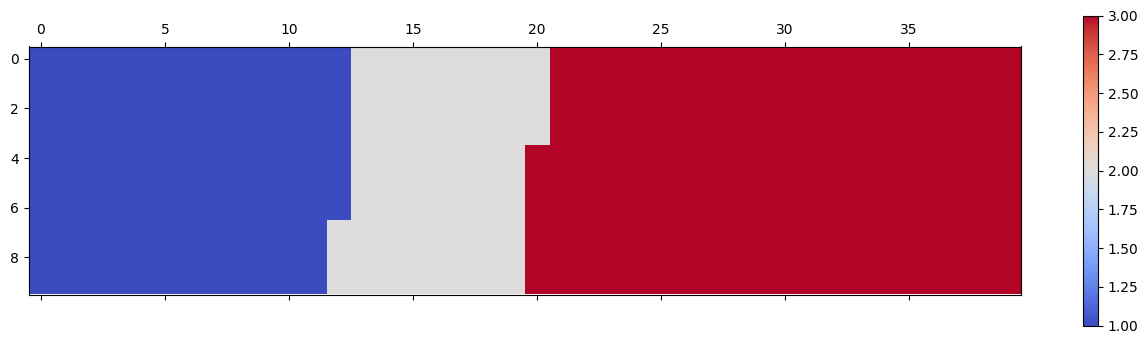

In [83]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

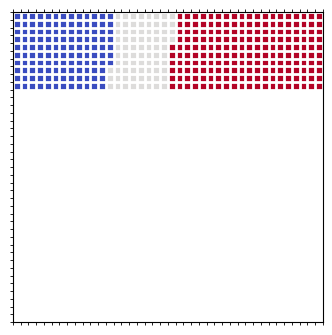

In [88]:
fig = plt.figure()
colormap = plt.cm.coolwarm 
plt.matshow(waffle_chart, cmap =colormap)
ax = plt.gca()

ax.set_xticks(np.arange(-.5,(width),1), minor = True)
ax.set_yticks(np.arange(-.5,(width),1), minor = True)

ax.grid(which='minor', color ='w', linestyle='-',linewidth=2)
plt.xticks([])
plt.yticks([])

Lanjut sendiri ya gais

Bonus rekap when to use .. chart:
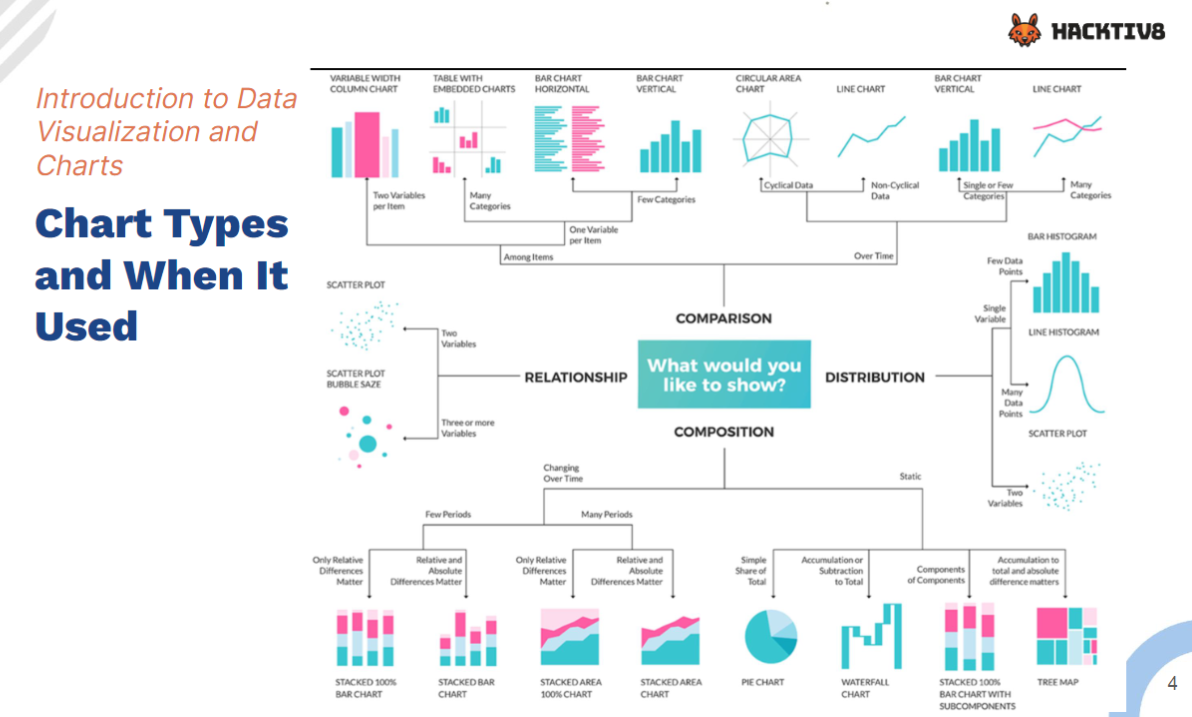

+ pelajari tentang tools dashboard:
   + Power BI
   + Tableau
   + Looker

---
$end$  
---